In [2]:
#Heart Failure Prediction
import ds_functions as ds
import pandas as pd
import numpy as np

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
original = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')

cols_nr = original.select_dtypes(include='number')
cols_sb = original.select_dtypes(include='category')

cols_nr


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
#Normalizing the data (between 0 and 1) using MinMax Scaler
import ds_functions as ds
import scipy as sc
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_original = original.drop('DEATH_EVENT', axis=1)
Y_original = original['DEATH_EVENT']

transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(X_original)
original_df = pd.DataFrame(transf.transform(X_original), columns= X_original.columns)
original_df.describe(include='all')
print(original_df.mean())

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(X_original)
Norm_df = pd.DataFrame(transf.transform(X_original), columns= X_original.columns)
Norm_df.describe(include='all')
print(Norm_df.mean())

age                         5.265205e-16
anaemia                     3.594301e-16
creatinine_phosphokinase    3.713120e-18
diabetes                    1.113936e-16
ejection_fraction           3.341808e-18
high_blood_pressure        -4.841909e-16
platelets                   1.009969e-16
serum_creatinine           -2.227872e-18
serum_sodium               -8.627435e-16
sex                        -5.940993e-18
smoking                    -3.861645e-17
time                       -1.069379e-16
dtype: float64
age                         0.378798
anaemia                     0.431438
creatinine_phosphokinase    0.071299
diabetes                    0.418060
ejection_fraction           0.364903
high_blood_pressure         0.351171
platelets                   0.288833
serum_creatinine            0.100436
serum_sodium                0.675012
sex                         0.648829
smoking                     0.321070
time                        0.449327
dtype: float64


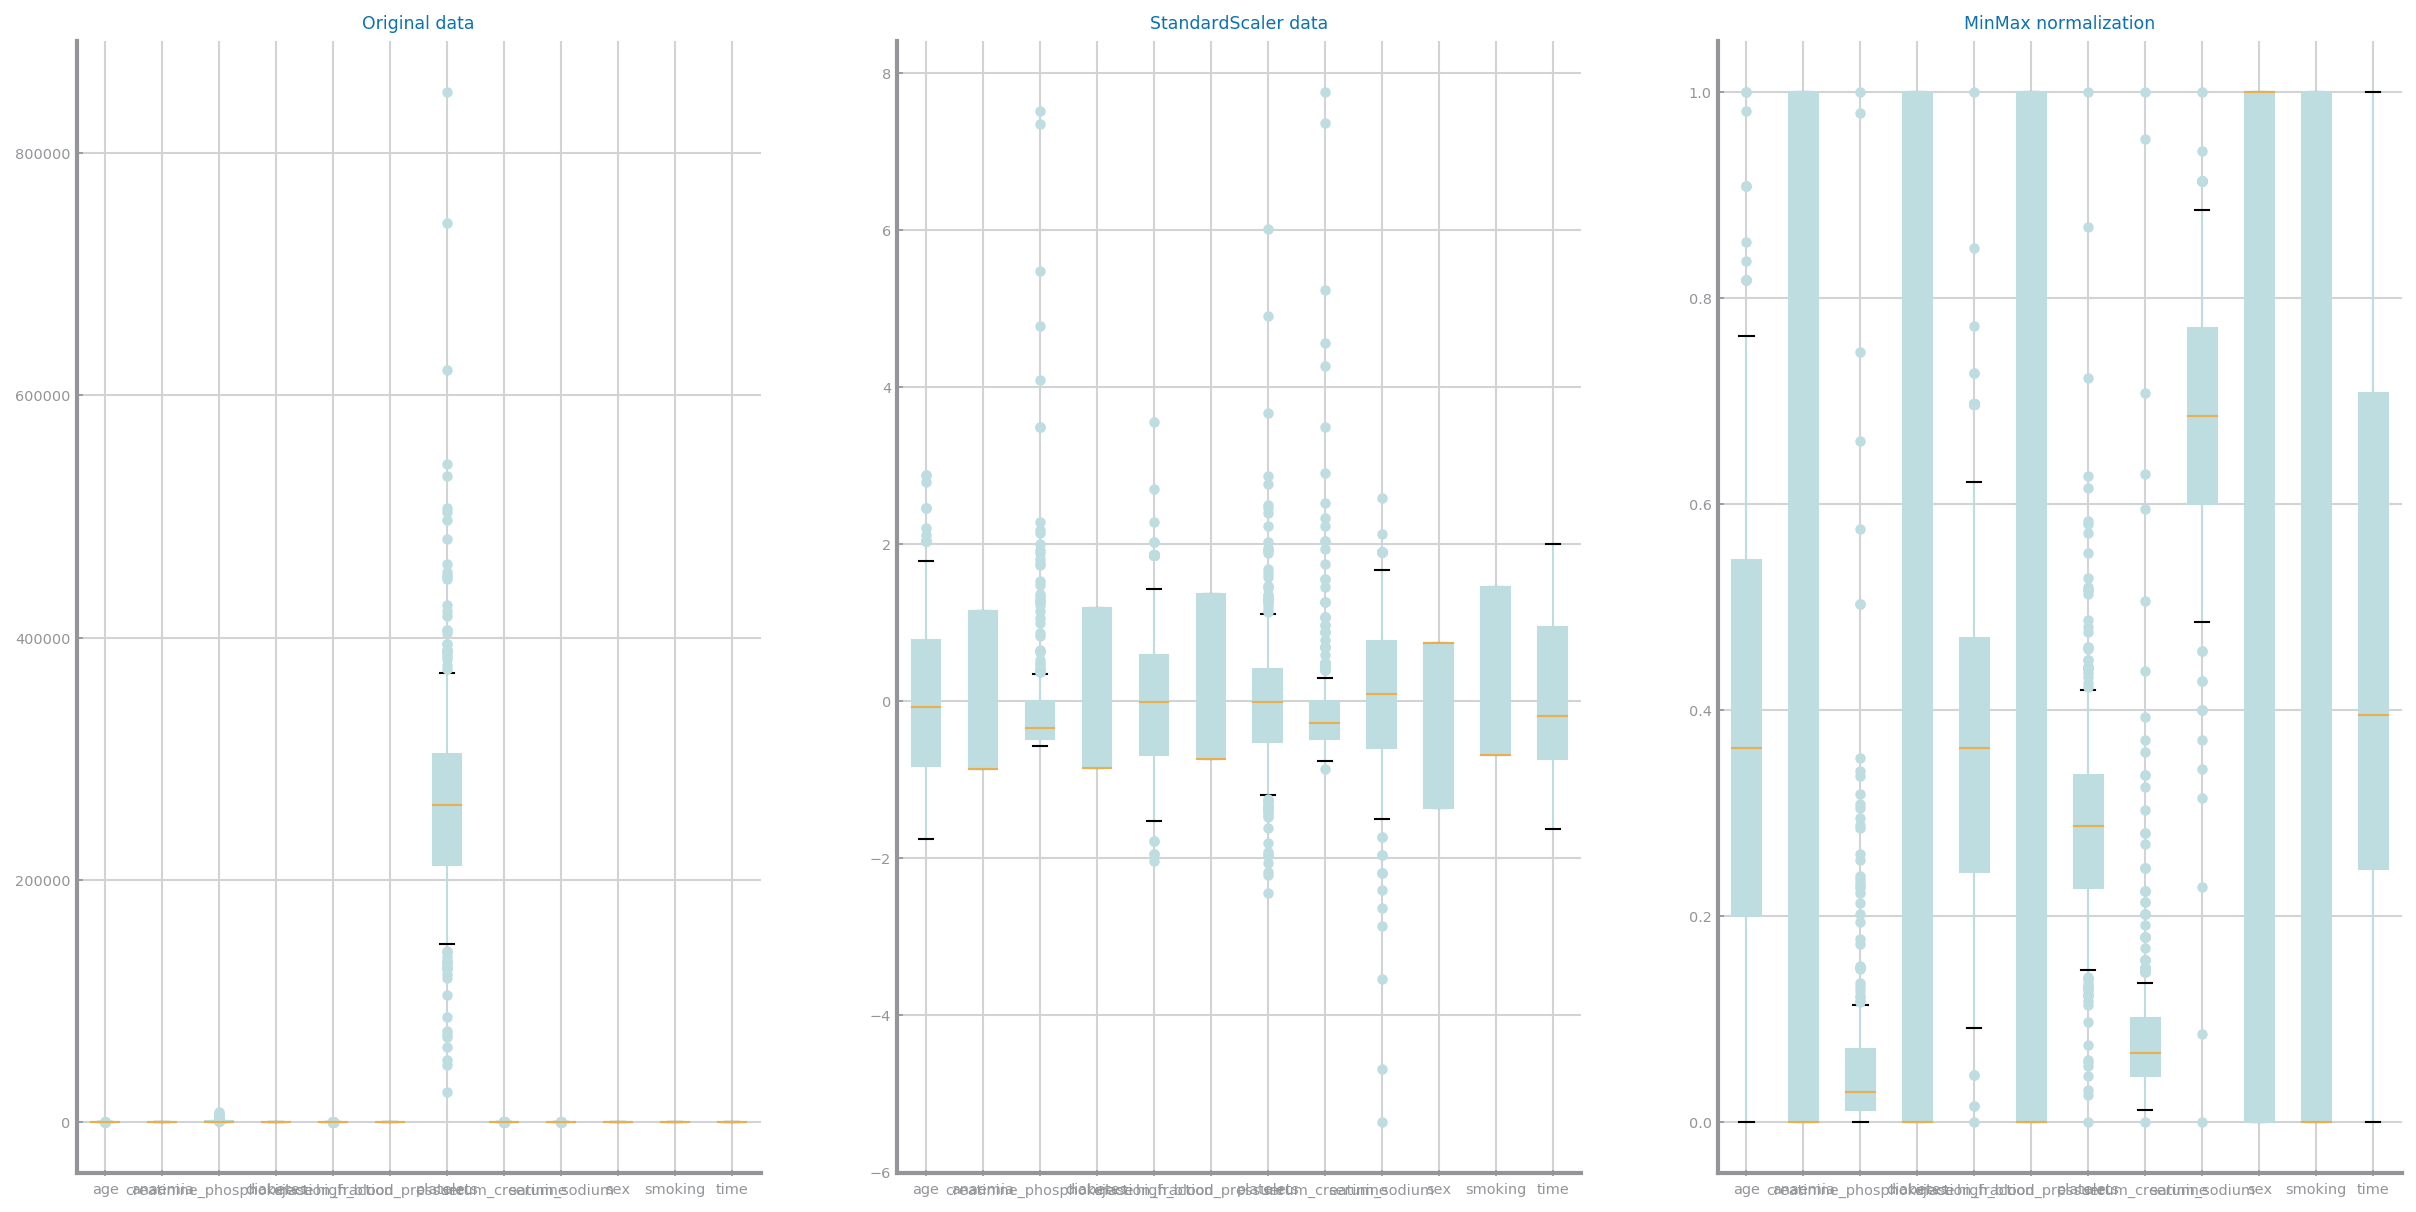

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(20,10),squeeze=False)
axs[0, 0].set_title('Original data')
X_original.boxplot(ax=axs[0, 0])

axs[0, 1].set_title('StandardScaler data')
original_df.boxplot(ax=axs[0, 1])

axs[0, 2].set_title('MinMax normalization')
Norm_df.boxplot(ax=axs[0, 2])
#fig.tight_layout()
plt.show()

In [5]:
print(original.mean())
print(original_df.mean())
print(Norm_df.mean())

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64
age                         5.265205e-16
anaemia                     3.594301e-16
creatinine_phosphokinase    3.713120e-18
diabetes                    1.113936e-16
ejection_fraction           3.341808e-18
high_blood_pressure        -4.841909e-16
platelets                   1.009969e-16
serum_creatinine           -2.227872e-18
serum_sodium               -8.627435e-16
sex                        -5.940993e-18
smoking                    -3

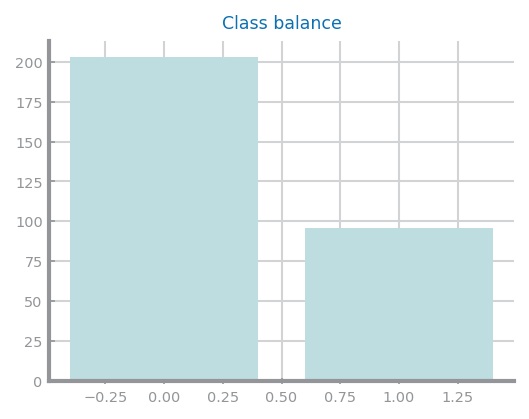

Minority class: 96
Majority class: 203
Proportion: 0.47 : 1


In [8]:
#Class Balance #

import matplotlib.pyplot as plt

target_count = original['DEATH_EVENT'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

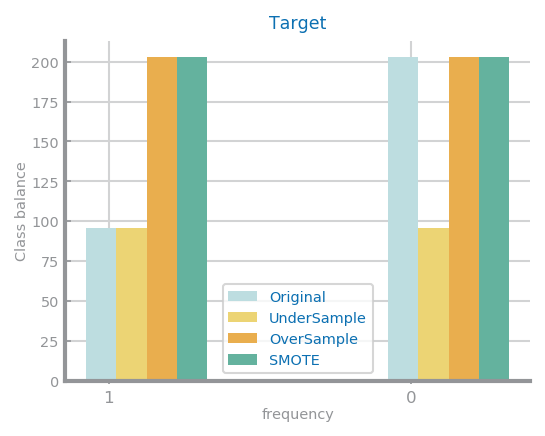

In [9]:

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = original[original['DEATH_EVENT'] == min_class]
df_class_max = original[original['DEATH_EVENT'] != min_class]

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
y = original.pop('DEATH_EVENT').values
X = original.values
smote_X, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='frequency', ylabel='Class balance')
plt.show()

In [11]:
X
v1 = 0
v2 = 4

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

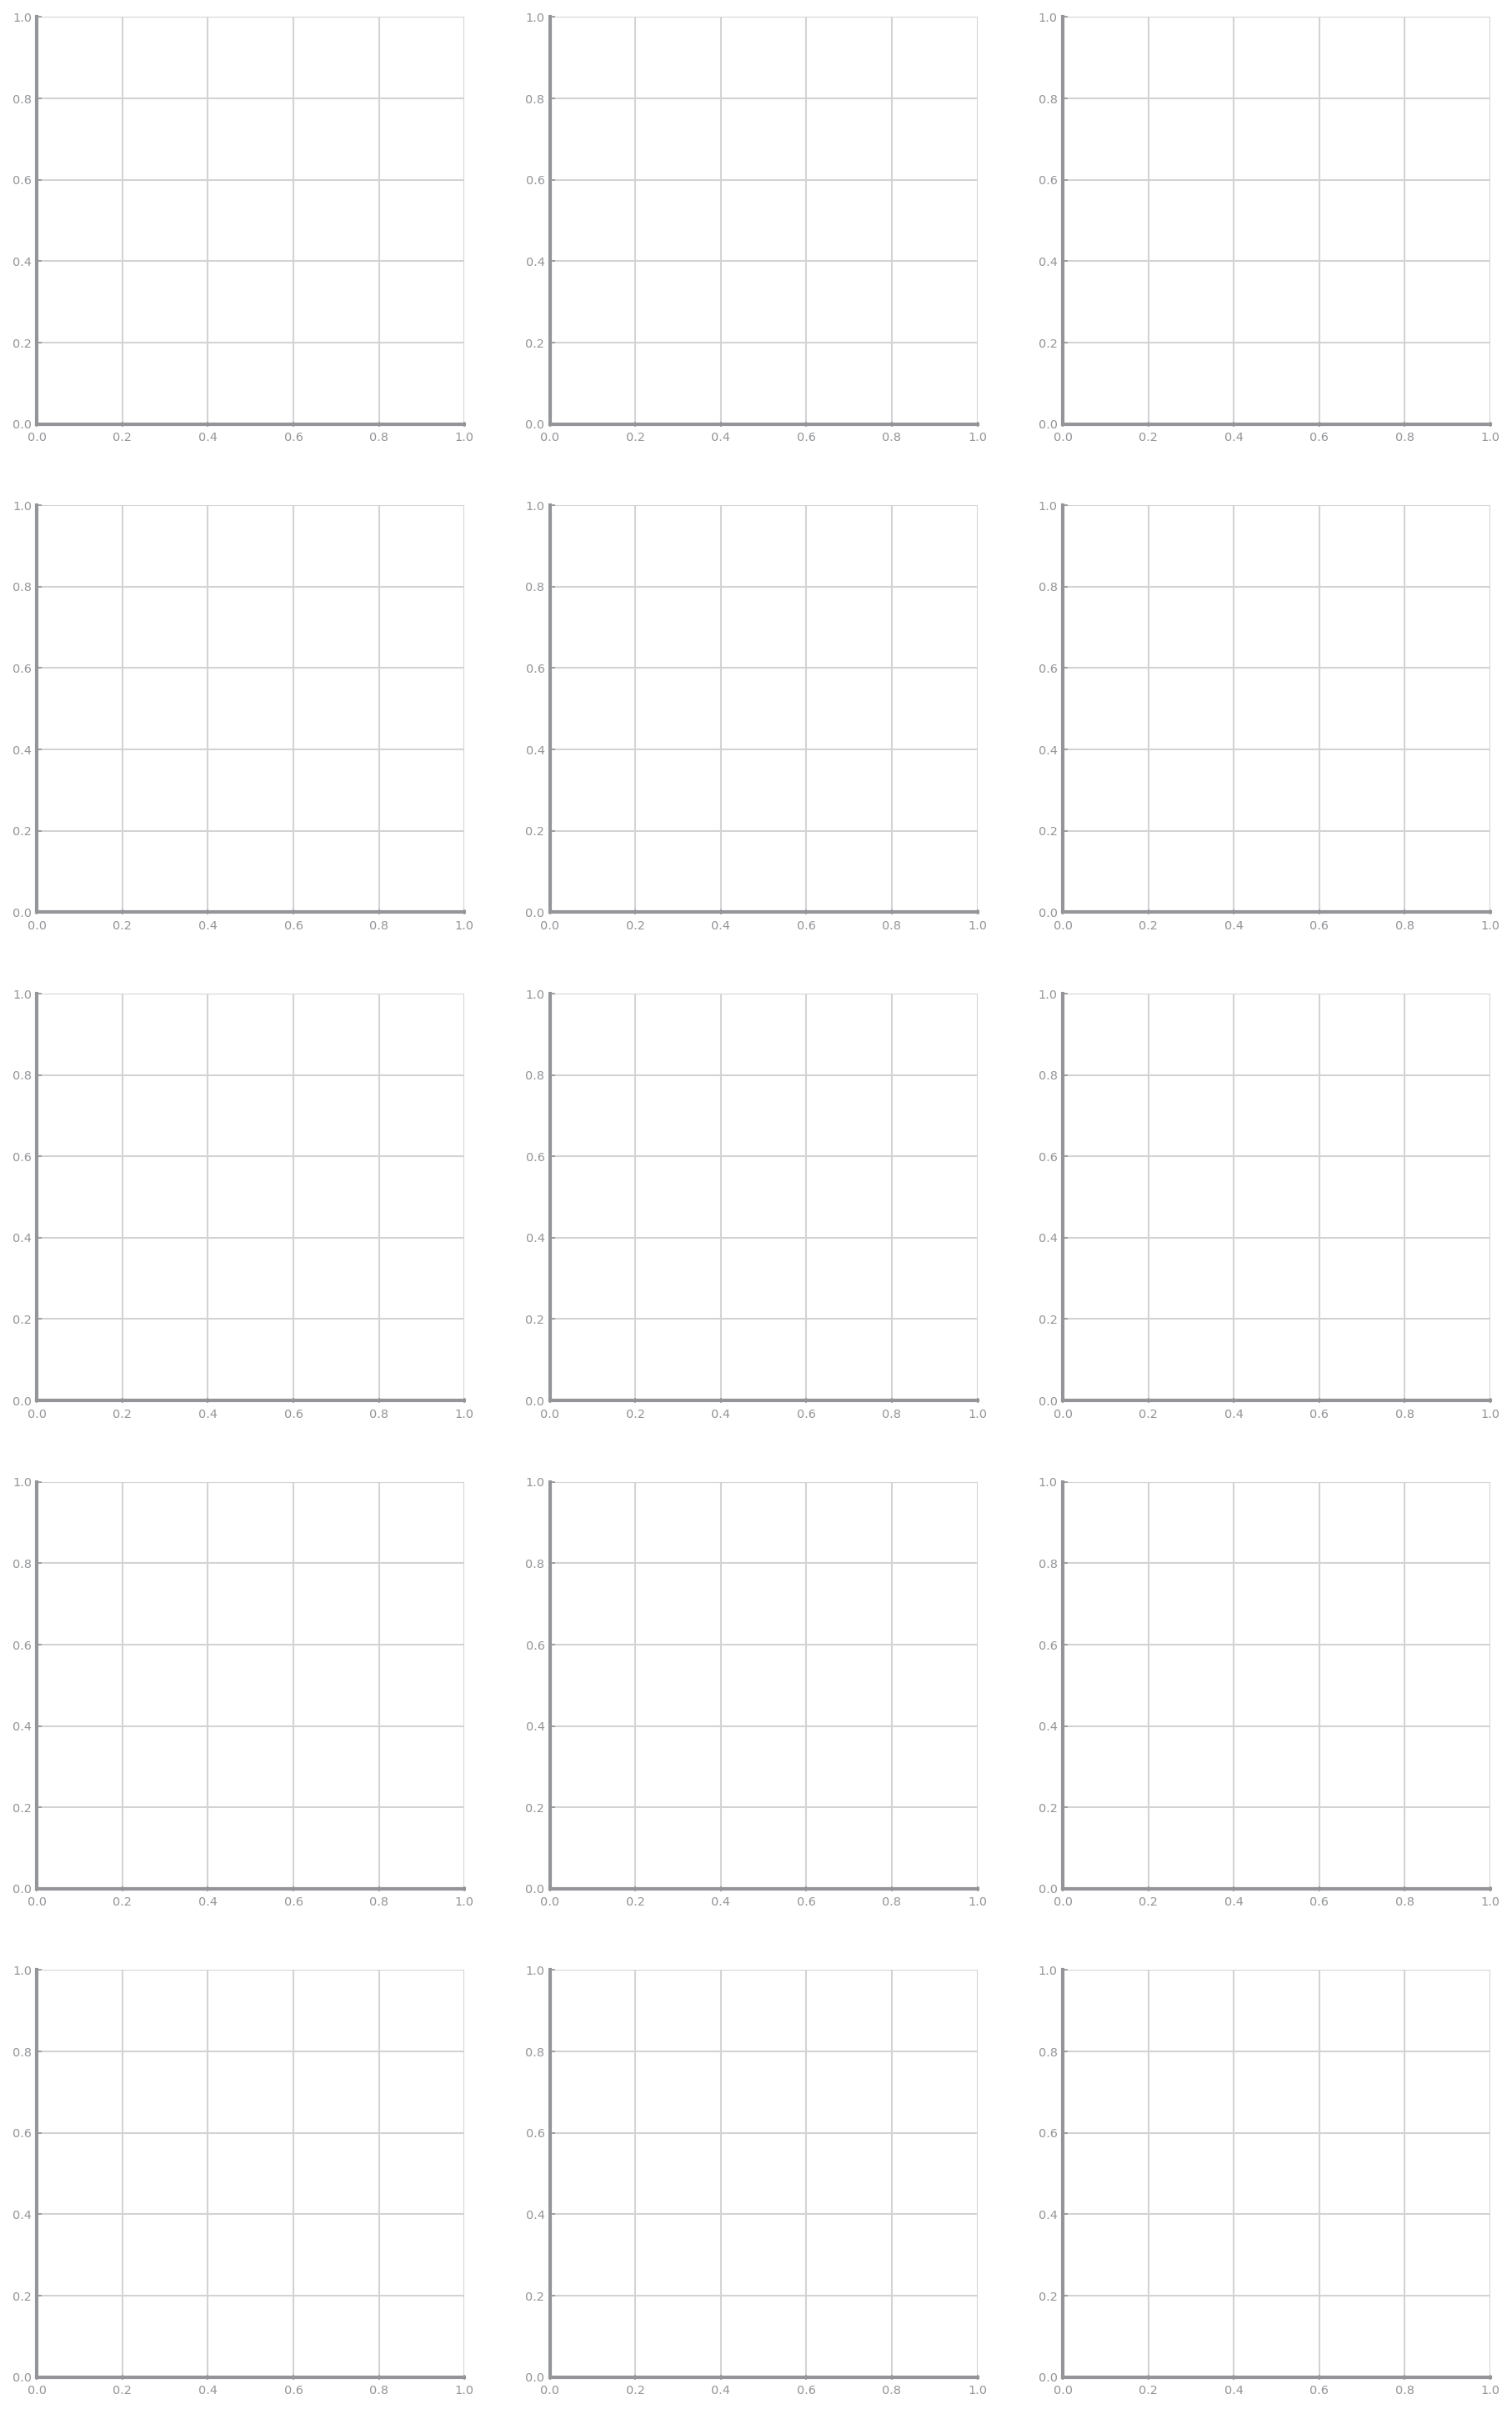

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

mse: list = []
sc: list = []
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = KMeans(n_clusters=k)
    estimator.fit(X)
    mse.append(estimator.inertia_)
    sc.append(silhouette_score(X, estimator.labels_))
    ds.plot_clusters(X, v2, v1, estimator.labels_.astype(float), estimator.cluster_centers_, k,
                     f'KMeans k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

In [13]:
# Second Dataset
original2 = pd.read_csv('qsar_oral_toxicity.csv', sep=',', decimal='.')

cols_nr = original2.select_dtypes(include='number')
cols_sb = original2.select_dtypes(include='category')

original2.describe(include='all')

,Column1,Columnpositive,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column1016,Column1017,Column1018,Column1019,Column10positive0,Column10positive1,Column10positivepositive,Column10positive3,Column10positive4,Result
count,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,...,8992.000000,8992.000000,8992.000000,8992.00000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8251
mean,0.212967,0.035698,0.068728,0.033363,0.018683,0.144795,0.123109,0.193728,0.013790,0.017349,...,0.061277,0.016681,0.164368,0.23899,0.022464,0.022020,0.021797,0.022353,0.018461,NaN
std,0.409427,0.185547,0.253005,0.179593,0.135411,0.351914,0.328581,0.395240,0.116625,0.130574,...,0.239850,0.128082,0.370630,0.42649,0.148197,0.146755,0.146029,0.147838,0.134618,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [35]:
from sklearn.impute import SimpleImputer

#imp = SimpleImputer(strategy='constant', fill_value='NA', missing_values=np.nan, copy=True)
#imp = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True) #cannot use mean method with non numeric data
imp = SimpleImputer(strategy='most_frequent', missing_values='', copy=True) #Results from the most_frequent and constant are the same
imp.fit(original2.values)
mat = imp.transform(original2.values)
data = pd.DataFrame(mat, columns=original2.columns)
data.describe(include='all')

,Column1,Columnpositive,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column1016,Column1017,Column1018,Column1019,Column10positive0,Column10positive1,Column10positivepositive,Column10positive3,Column10positive4,Result
count,8992,8992,8992,8992,8992,8992,8992,8992,8992,8992,...,8992,8992,8992,8992,8992,8992,8992,8992,8992,8992
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
freq,7077,8671,8374,8692,8824,7690,7885,7250,8868,8836,...,8441,8842,7514,6843,8790,8794,8796,8791,8826,8251


In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_label = le.fit_transform(data['Result'])
data_label = pd.DataFrame(data_label)
data['Target'] = data_label
data.drop('Result', axis='columns', inplace=True)
data

# transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data)
# data_df = pd.DataFrame(transf.transform(data), columns= data.columns)
# data_df.describe(include='all')
# print(data_df.mean())

# transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(data)
# Norm_df2 = pd.DataFrame(transf.transform(data), columns= data.columns)
# Norm_df2.describe(include='all')
# print(Norm_df2.mean())

# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(1, 3, figsize=(20,10),squeeze=False)
# axs[0, 0].set_title('Original data')
# data.boxplot(ax=axs[0, 0])
# axs[0, 1].set_title('Z-score normalization')
# data_df.boxplot(ax=axs[0, 1])
# axs[0, 2].set_title('MinMax normalization')
# Norm_df2.boxplot(ax=axs[0, 2])
# #fig.tight_layout()
# plt.show()

,Column1,Columnpositive,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column1016,Column1017,Column1018,Column1019,Column10positive0,Column10positive1,Column10positivepositive,Column10positive3,Column10positive4,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8988,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#PCA#
from sklearn.decomposition import PCA
X_data = data.drop('Target', axis=1)
y_data = data['Target']
model = PCA(n_components=2) 
model.fit(X_data) 
X_2D = model.transform(X_data)
X_2D

array([[ 1.02795831, -3.13400231],
       [ 1.17301349, -2.72084493],
       [ 0.95952671, -2.69780166],
       ...,
       [ 0.97423694, -0.89139231],
       [-2.02211852, -2.10232345],
       [-3.20479907, -2.05396466]])

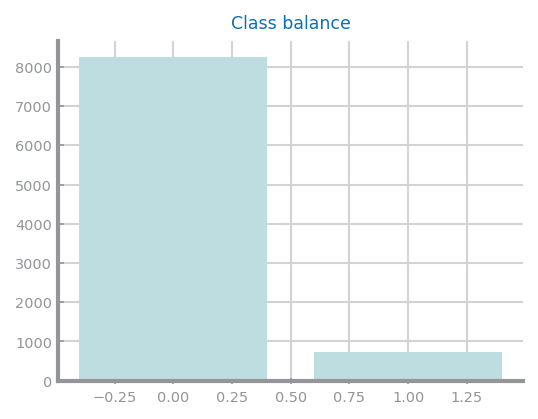

Minority class: 741
Majority class: 8251
Proportion: 0.09 : 1


In [31]:
target_count = data['Target'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

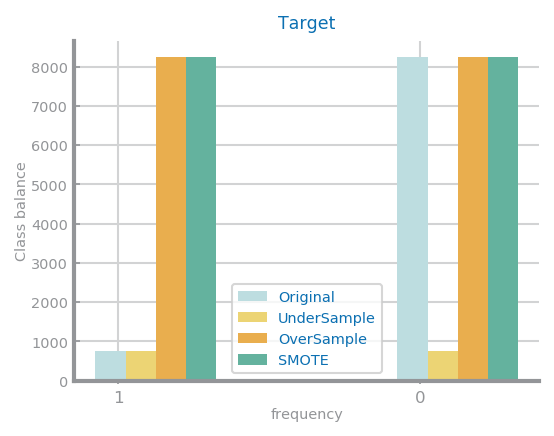

In [32]:
import ds_functions as ds
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = data[data['Target'] == min_class]
df_class_max = data[data['Target'] != min_class]

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
y = data.pop('Target').values
X = data.values
smote_X, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='frequency', ylabel='Class balance')
plt.show()

In [33]:
# X_data = data
# X_data.shape
# y_data = iris['Target']
# y_data.shape

data

,Column1,Columnpositive,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column1015,Column1016,Column1017,Column1018,Column1019,Column10positive0,Column10positive1,Column10positivepositive,Column10positive3,Column10positive4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8988,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
